In [1]:
import sys
!{sys.executable} -m pip install sklearn

In [3]:
import sys
!{sys.executable} -m pip install plotly

     |████████████████████████████████| 15.2 MB 276 kB/s eta 0:00:01


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [60]:
df=pd.read_excel("Final_Data.xlsx")

In [61]:
df['Vision'].replace(['Open', 'Closed'], [1, 0], inplace=True)
df['Surface'].replace(['Firm', 'Foam'], [1, 0], inplace=True)

In [7]:
df.head()

,Unnamed: 0,Trial,Unnamed: 1,Vision,Surface,Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],...,Max_COPx,Min_COPy,Coeff_stab,Fx/Fz,Fy/Fz,Section,Min_COPx,Max_COPy,Ecart_COPx,Ecart_COPy
0,0,BDS00001,1,1,1,-1.732227,-3.811173,537.878822,5.218416,43.218262,...,-7.353309,0.612749,4.186365,-0.003220,-0.007086,1.402341,-9.029349,1.449448,1.676040,0.836699
1,1,BDS00002,2,1,1,-1.627292,-4.235726,535.285603,2.955367,41.121174,...,-6.638454,0.140214,4.537560,-0.003040,-0.007913,1.814866,-8.891325,0.945793,2.252871,0.805579
2,2,BDS00003,3,1,1,-1.566174,-4.603948,534.938451,2.289978,42.048856,...,-7.285561,0.058207,4.863048,-0.002928,-0.008607,0.771987,-8.504962,0.691294,1.219401,0.633087
3,3,BDS00004,4,0,1,1.843765,-4.005788,531.874216,3.239688,36.531572,...,-6.302602,0.304533,4.409739,0.003467,-0.007531,0.736278,-7.331580,1.020076,1.028978,0.715543
4,4,BDS00005,5,0,1,6.367666,-0.937484,529.691440,2.962939,40.596105,...,-6.513514,0.077692,6.436307,0.012021,-0.001770,2.270045,-8.636317,1.147054,2.122803,1.069362


In [63]:
features = ['Coeff_stab','Section', 'COPx[cm]', 'COPy[cm]']
x = df.loc[:, features].values
y = df.loc[:,['Surface',"Vision"]].values

In [64]:
x = StandardScaler().fit_transform(x)

In [65]:
pd.DataFrame(data = x, columns = features).head()

,Coeff_stab,Section,COPx[cm],COPy[cm]
0,-0.265416,-0.878199,-3.350621,0.796850
1,-0.096661,-0.857526,-3.185098,0.449539
2,0.059742,-0.909788,-3.268787,0.346501
3,-0.158081,-0.911577,-2.803366,0.496899
4,0.815721,-0.834715,-3.176691,0.455522


In [66]:
pca = PCA(n_components=2)

In [67]:
principalComponents = pca.fit_transform(x)

In [68]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [16]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.897782,0.496654
1,-2.644184,0.785136
2,-2.645928,0.945012
3,-2.478884,0.595304
4,-2.260729,0.964858


In [69]:
finalDf = pd.concat([principalDf, df[['Vision',"Surface"]]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Vision,Surface
0,-2.897782,0.496654,1,1
1,-2.644184,0.785136,1,1
2,-2.645928,0.945012,1,1
3,-2.478884,0.595304,0,1
4,-2.260729,0.964858,0,1


In [70]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(finalDf) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.598918,-0.416366
1,-0.614499,-0.429420


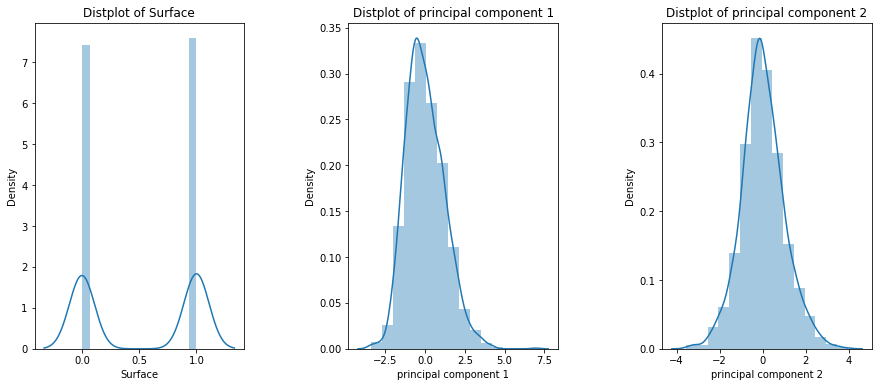

In [19]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Surface' , 'principal component 1','principal component 2']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(finalDf[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

Heatmap :

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

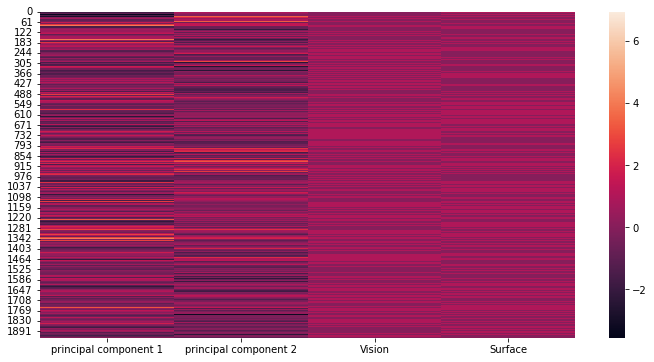

In [77]:
plt.figure(1, figsize = (12 ,6))
sns.heatmap(finalDf)
plt.show()

Dendrogram :

A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

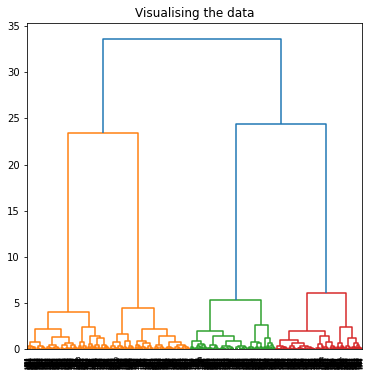

In [71]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

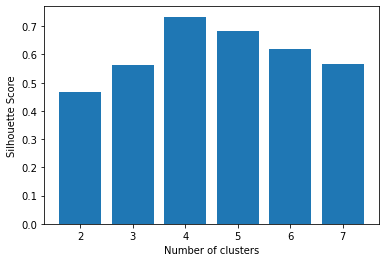

In [72]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Building and Visualizing clustering model for k = 4

In [73]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=4)

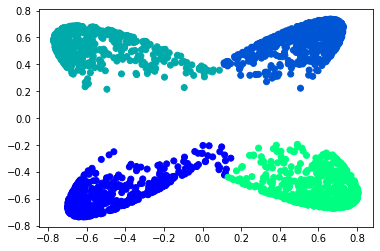

In [75]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

Hierarchical clustering
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.